<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/Ecuaci%C3%B3n_de_onda_M%C3%A9todo_expl%C3%ADcito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=9> Ecuación de onda.  </font>

----

<font size=4 color="lime">
Resolver el problema propuesto en la imagen adjunta usando el Método explícito</font>


<font size=2>$$\frac{u_{i,j+1} - 2u_{i,j}+u_{i,j-1}}{k^2} = α^2 \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2} $$

<font size=2>$$u_{i,j+1} = r(u_{i+1,j}+u_{i-1,j}) + (2 - 2r)u_{i,j} -(u_{i,j-1})$$


In [172]:
# Librerias
import sympy as sp
import numpy as np

In [41]:
def f(x):                                        # Definimos la funcion que evalua x
    return np.sin(np.pi*x)                       # Nos regresa el valor f(x)

In [215]:
# Valores de inicio
n = 9       # Tamaño de la Matriz
j = 100     # Número de pasos
# Variables de la matriz A
dp = 0      # Valor en la diagonal principal
ds = 1      # Valor en las diagonales superior e inferior

<font size=3>Matriz <font size=3 color="lime">$A$</font><font size=3> usando Sympy

---

<font size=2 color="lime"> $n$ </font><font size=2>el tamaño de la matriz

<font size=2 color="lime"> $2r-2$ </font><font size=2>donde $r=1$ resulta en $2-2=$<font size=2 color="lime">$0$

<font size=2 color="lime"> $r$ </font><font size=2>donde $r=1$ resulta en <font size=2 color="lime">$1$

In [40]:
A = sp.Matrix(                          # Creamos la matriz con sp, para que tenga el mismo formato
        np.diag(np.full(n, dp)) +          # Indicamos que la diagonal principal sean 3, 9x3
        np.diag(np.full(n-1, ds), k=1) +   # Indicamos que la diagonal superior sean -1, 8x1
        np.diag(np.full(n-1, ds), k=-1))   # Indicamos que la diagonal inferior sean -1, 8x1

print("Matriz A usando NumPy \n")
A

Matriz A usando NumPy 



Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

<font size=3>Matriz <font size=3 color="lime">$b$</font><font size=3> usando Sympy

---

<font size=2 color="lime"> $b_1$ </font><font size=2> Son los valores iniciales

<font size=2 color="lime"> $f$ </font><font size=2>es la funcion en la que se evaluan los valores de <font size=2 color="lime"> $0.1*i$

In [82]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])
b1=b.copy()
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<font size=3>Definimos la función <font color="lime">Onda</font>, que nos regresara la matriz <font color="lime">$S$</font>, que contiene todos los valores de las <font color="lime">$j$</font> iteraciones.

In [202]:
def onda(A, b, b1, j):              # Creamos un metodo para Onda
    b = sp.Matrix(b)                # Trasponemos los valores de b
    b1 = sp.Matrix(b1)              # Trasponemos los valores de b1
    S = [b, b1]                     # Los guardamos en una lista para almacenar los estados

    for n in range(2, j):           # Iteramos apartir del 3er valor (por que necesitamos los valores anteriores)
        sol = A * S[n-1] - S[n-2]   # Aplicamos el metodo y guardamos la solucion en sol
        S.append(sol)               # Agregamos la sol a l final de S

    return sp.Matrix([s.T for s in S]) # Regresamos S pero Traspuesta

In [203]:
U = onda(A, b, b1, j)               # Calculamos la solución de la onda hasta j (j=50)
#U

&nbsp;&nbsp;&nbsp;&nbsp;<font color="lime">$list(U.row(i))$ </font>Creamos una lista con las filas

&nbsp;&nbsp;&nbsp;&nbsp;<font color="lime">$data$ </font> Guarda la lista de datos

&nbsp;&nbsp;&nbsp;&nbsp;<font color="lime">$tablefmt$$ </font> Es el formato de la tabla, en este caso "grid" crea unos bordes sencillos, y "heavy_grid" crea unos borde gruesos

In [204]:
data = [list(U.row(i)) for i in range(21)]       # Creamos una lista con los datos de U (el método Onda) para j=20 (21-2)
print(tabulate(data, tablefmt="heavy_grid"))     # Imprimimos los datos

┏━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃  0.309017  ┃  0.587785 ┃  0.809017 ┃  0.951057 ┃  1        ┃  0.951057 ┃  0.809017 ┃  0.587785 ┃  0.309017  ┃
┣━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0.309017  ┃  0.587785 ┃  0.809017 ┃  0.951057 ┃  1        ┃  0.951057 ┃  0.809017 ┃  0.587785 ┃  0.309017  ┃
┣━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0.278768  ┃  0.530249 ┃  0.729825 ┃  0.85796  ┃  0.902113 ┃  0.85796  ┃  0.729825 ┃  0.530249 ┃  0.278768  ┃
┣━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃  0.221232  ┃  0.420808 ┃  0.579192 ┃  0.680881 ┃  0.715921 ┃  0.680881 ┃  0.579192 ┃  0.420808 ┃  0.221232  ┃
┣━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━

In [234]:
# Modificamos la matriz U, para añadir "titulos"
Ux=sp.zeros(j+1,int(9/2)+3)                   # Creamos una matriz de ceros
for i in range(j):                            # Iniciamos un for al rango de las iteraciones del método de Onda
  Ux[i,0]=i-1
  for k in range(int(9/2)+1):                 # Iniciamos otro for al rango de valores en x (llegamos a la mitad, porqué los demas son iguales)
    Ux[i+1,k+1]=U[i,k]                        # Ponemos las demas iteraciones en U

data = [list(Ux.row(i)) for i in range(22)] # Guardamos todos los datos en uns lista
data[0][0]="x"                                # Insertamos la t, en el lugar [0,0]

print(tabulate(data, tablefmt="heavy_grid"))  # Imprimimos los datos modificados

┏━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━┓
┃ x  ┃  0         ┃  0        ┃  0        ┃  0        ┃  0        ┃ 0 ┃
┣━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━┫
┃ 0  ┃  0.309017  ┃  0.587785 ┃  0.809017 ┃  0.951057 ┃  1        ┃ 0 ┃
┣━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━┫
┃ 1  ┃  0.309017  ┃  0.587785 ┃  0.809017 ┃  0.951057 ┃  1        ┃ 0 ┃
┣━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━┫
┃ 2  ┃  0.278768  ┃  0.530249 ┃  0.729825 ┃  0.85796  ┃  0.902113 ┃ 0 ┃
┣━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━┫
┃ 3  ┃  0.221232  ┃  0.420808 ┃  0.579192 ┃  0.680881 ┃  0.715921 ┃ 0 ┃
┣━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━┫
┃ 4  ┃  0.14204   ┃  0.270175 ┃  0.371864 ┃  0.437153 ┃  0.45965  ┃ 0 ┃
┣━━━━╋━━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━╋━━━┫
┃ 5  ┃  0.0489435 ┃  0.093096 ┃  0.128136 ┃  0.150633 ┃  0.15838

<font size=4 color="lime">Ejercicio 1: </font>

<font size=3> <p>Ejercicio 1: Generar las gráficas 2D y 3D de la solución hasta t=0.50 </p><p>
</p><p>
Observe hasta que valor de t llega.</font>

----

In [126]:
import matplotlib.pyplot as plt # Gráficas 2D
from mpl_toolkits.mplot3d import Axes3D # Gráficas 3D
from matplotlib import cm # Mapas de colores
from tabulate import tabulate # Tablas

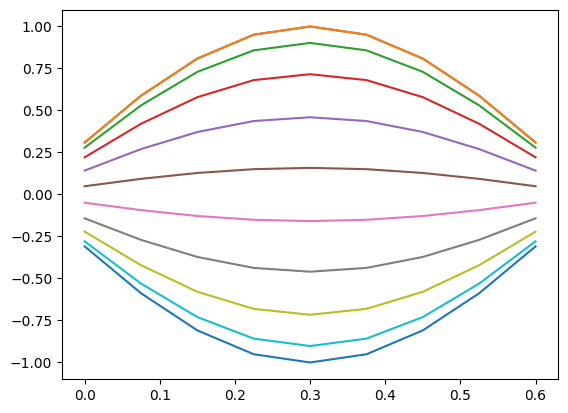

In [157]:
# Grafica
U_np = np.array(U.tolist(), dtype=float)  # Convertimos la matriz U de Sympy a NumPy

# Codigo extraido de Github
x = np.linspace(0, 0.6, 9)                # Puntos en X
y = np.linspace(0, 0.5, j)                # Puntos en Y (t=0.5)
for i in range(11):                       # Graficamos 10 valores (11-2)
    plt.plot(x, U_np[i])                  # Indicamos cada lista de valores

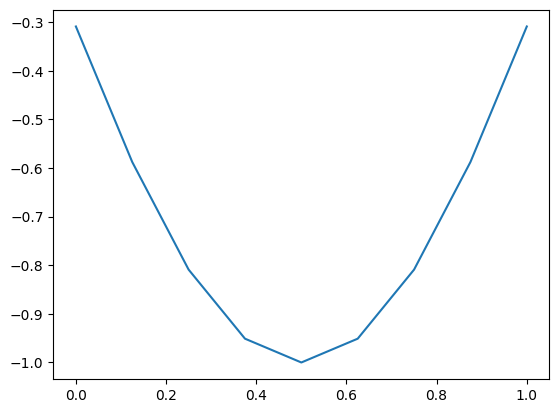

In [150]:
# Grafica
# Imprimimos los valores de j=10 (11-2)
#plt.plot(x, b)
plt.plot(x, U_np[11])

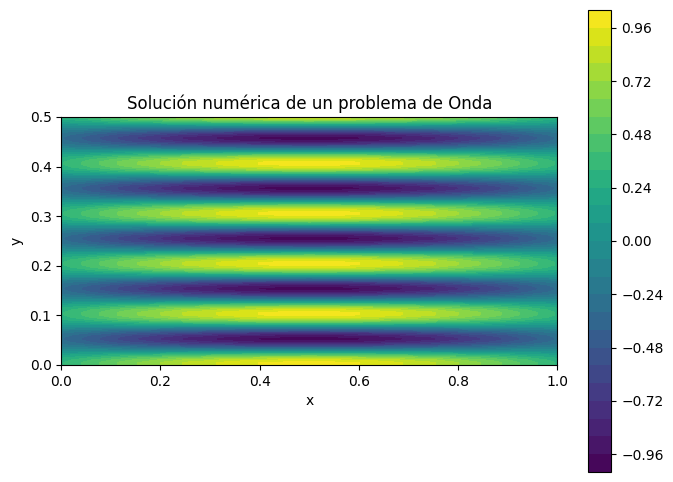

In [178]:
# Grafica
# Codigo extraido de Github
X, Y = np.meshgrid(x, y)
# Mapa de colores
plt.figure(figsize=(8, 6))                                    #Tamaño de la grafica
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)                                         #Barra de colores
plt.title('Solución numérica de un problema de Onda')    #Titulo
plt.xlabel('x')                                               #Eje X
plt.ylabel('y')                                               #Eje Y
plt.gca().set_aspect('equal', adjustable='box')               #Aspecto de la grafica
plt.show()

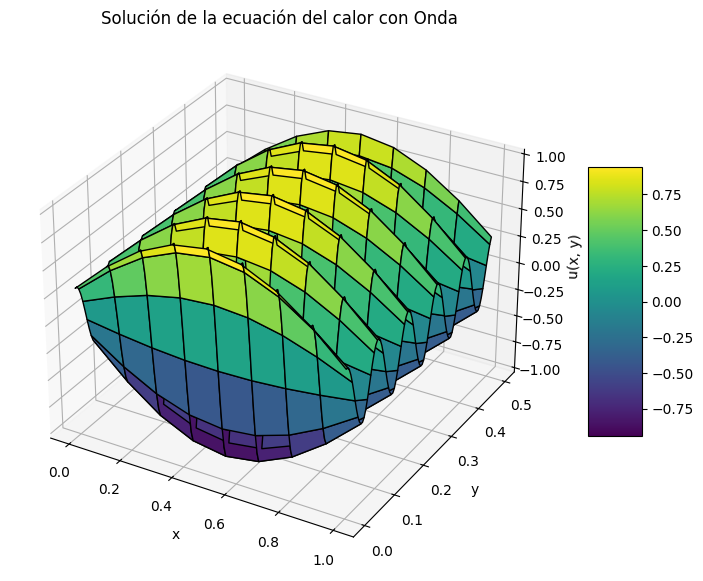

In [179]:
# Grafica 3D
# Codigo extraido de Github
#%matplotlib notebook
fig = plt.figure(figsize=(10, 7))                                     # Tamaño de la grafica
ax = fig.add_subplot(111, projection='3d')                            # Densidad de puntos
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')    # Colores de la superficie
ax.set_title('Solución de la ecuación del calor con Onda')  # Titulo
ax.set_xlabel('x')                                                    # Titulos en x
ax.set_ylabel('y')                                                    # Titulos en y
ax.set_zlabel('u(x, y)')                                              # Titulos en z
fig.colorbar(surf, shrink=0.5, aspect=5)                              # Barra de colores
plt.show()                                                            # Mostramos la grafica                                                    # Mostrar la gráfica

<font size=4 color="lime">Ejercicio 2/3: </font>

<font size=4> <p>Comparar los valores correspondientes su solución numérica con los resultados numéricos que proporciona la Tabla 12.6, que viene en la imagen adjunta. Graficar y calcular el error.</p></font>

----

In [165]:
# Solución numérica
v_es = U_np[21]             # Valor numérico en t=20 (21-2)

def fex(x):                 # Definimos la funcion que evalua x
  return np.sin(np.pi*x)*np.cos(2*np.pi*0.5)      #  Evaluamos

v_ex = sp.Matrix([fex(0.1*(i+1)) for i in range(9)])  # Generamos el vector en los valores exactos
print(v_ex)
#Los numeros son negativos, pero en la tabla son positivos, asi que modificare los valores manualmente
v_ex = np.array([0.309016994374947, 0.587785252292473, 0.809016994374947, 0.9510565162951543, 1.0, 0.951056516295154, 0.809016994374947, 0.587785252292473, 0.309016994374948])
print(v_ex)

Matrix([[-0.309016994374947], [-0.587785252292473], [-0.809016994374947], [-0.951056516295154], [-1.00000000000000], [-0.951056516295154], [-0.809016994374947], [-0.587785252292473], [-0.309016994374948]])
[0.30901699 0.58778525 0.80901699 0.95105652 1.         0.95105652
 0.80901699 0.58778525 0.30901699]


In [160]:
# Error
error_abs = np.abs(np.array(v_ex) - np.array(v_es))                # Guardamos el valor de la diferecia entre los valores
data_e = list(zip(v_ex, v_es, error_abs))                          # Guardamos los valores en una lista de datos_error

print(tabulate(data_e,tablefmt="heavy_grid",headers=["Valor real", "Valor esperado", "Error"]))     # Imprimimos los datos

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃   Valor real ┃   Valor esperado ┃       Error ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.309017 ┃         0.309017 ┃ 1.66533e-16 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.587785 ┃         0.587785 ┃ 0           ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.809017 ┃         0.809017 ┃ 2.22045e-16 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.951057 ┃         0.951057 ┃ 9.99201e-16 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     1        ┃         1        ┃ 2.22045e-16 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.951057 ┃         0.951057 ┃ 6.66134e-16 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.809017 ┃         0.809017 ┃ 4.44089e-16 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.587785 ┃         0.587785 ┃ 3.33067e-16 ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━┫
┃     0.309017 ┃         0.309017 ┃ 2.77556e-16 ┃


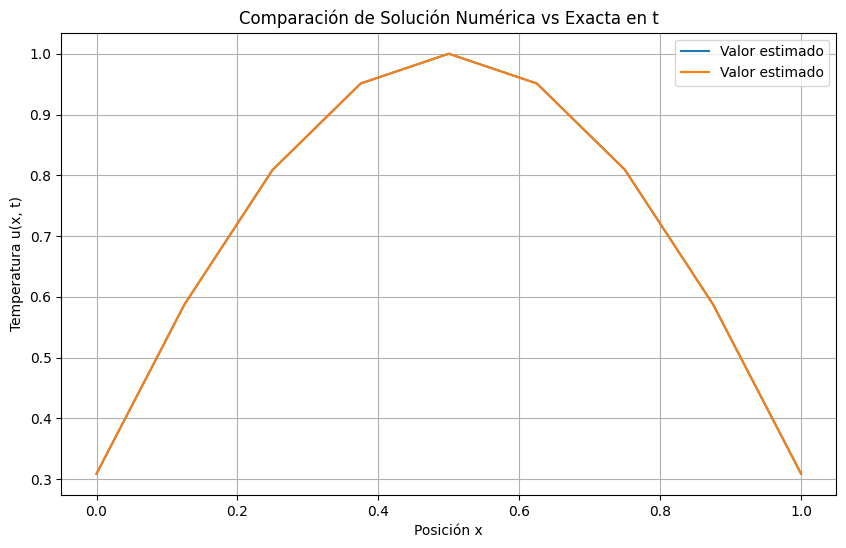

In [161]:
# Grafica
x = np.linspace(0, 1, 9)                              # Vector X
plt.figure(figsize=(10, 6))                           # Un tamaño de grafica de 10,6
plt.plot(x,v_es, label='Valor estimado')              # Valores del valor estimado
plt.plot(x,v_ex, label='Valor estimado')              # Valores del valor real
plt.title('Comparación de Solución Numérica vs Exacta en t')     # Titulo
plt.xlabel('Posición x')                              # Eje X
plt.ylabel('Temperatura u(x, t)')                     # Eje Y
plt.legend()                                          # Mostrar los titulos de las lineas
plt.grid()                                            # Mostrar la cuadricula
plt.show()

<font size=4 color="lime">Ejercicio 4: </font>

<font size=4> <p>Genere una animación de la evolución temporal de la solución, donde efectivamente se observen las ondulaciones de la onda.</p></font>

----

In [174]:
import matplotlib.pyplot as plt # Gráficas 2D
from mpl_toolkits.mplot3d import Axes3D # Gráficas 3D
from matplotlib import cm # Mapas de colores
from tabulate import tabulate # Tablas
from matplotlib.animation import FuncAnimation

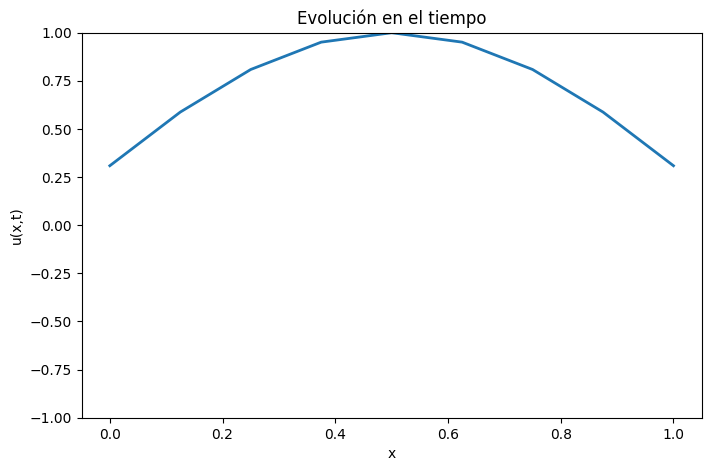

In [175]:
# Grafica Animada
# Codigo extraido de Github
#%matplotlib notebook
fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U_np[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

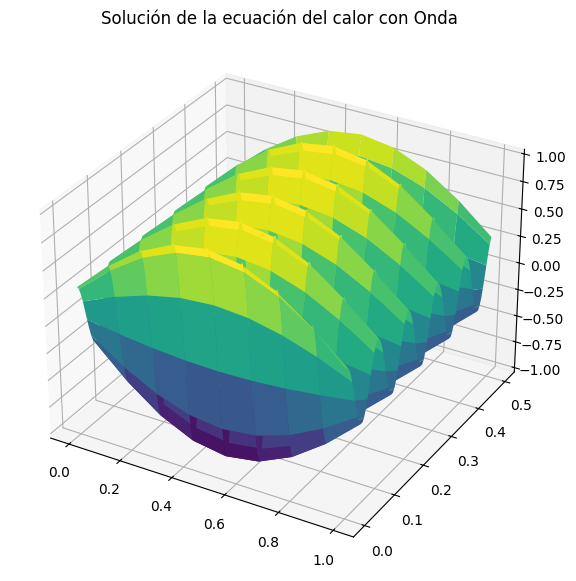

In [186]:
# Grafica 3D
# Codigo extraido de Github
#%matplotlib notebook
fig = plt.figure(figsize=(10, 7))                                     # Tamaño de la grafica
ax = fig.add_subplot(111, projection='3d')                            # Densidad de puntos
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis)                   # Colores de la superficie
ax.set_title('Solución de la ecuación del calor con Onda')            # Titulo
plt.show()                                                            # Mostramos la grafica